# Yelp Data Challenge - Clustering and PCA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [4]:
df = pd.read_csv('../dataset/2016_restaurant_reviews.csv')

In [5]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-03-31,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-02-10,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-07-13,0,GN7KnAaxJDrYgfJzgsvmkA,5,We decided to give Delmonico's a try because w...,0,C6kw0Rny7jZAGjTj0MWA3Q
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-04-01,0,i7xD3FY-EaF9O08QL69l5w,5,Absolutely impressed with this restaurant. The...,0,tTifjrXlRrUme-4c0UW9Bw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-10-15,0,ZqMUHOJg9lGOmfqQ7RXj7A,1,This was supposed to be a very special dinner ...,0,kOll36Me-rM9NsqoDnejKA


## 1. Cluster the review text data for all the restaurants

### Define your feature variables, here is the text of the review

In [6]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df.text.values

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [7]:
# Make a column and take the values, save to a variable named "target"
df.target = df.stars.apply(lambda x: 1 if x > 4 else 0)
df.target.describe()

/Users/jessie/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


count    178080.000000
mean          0.462809
std           0.498616
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: stars, dtype: float64

### Create training dataset and test dataset

In [8]:
from sklearn.cross_validation import train_test_split

/Users/jessie/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# documents is your X, target is your y
# Now split the data to training set and test set
documents_train, documents_test, target_train, target_test = train_test_split(
     documents, df.target, test_size=0.9, random_state=42)

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer = TfidfVectorizer(stop_words = 'english', max_features=1000)

In [12]:
# Train the model with your training data
vectorized_train = vectorizer.fit_transform(documents_train).toarray()

In [13]:
# Get the vocab of your tfidf
#vectorizer.vocabulary_
vocab = vectorizer.get_feature_names()

In [14]:
# Use the trained model to transform all the reviews
reviews = vectorizer.transform(documents).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(vectorized_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [16]:
cluster_pred = kmeans.predict(reviews)

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [17]:
key10 = np.argsort(kmeans.cluster_centers_,1)[:,-1:-11:-1]

#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [18]:
#type(key10)
for i,c in enumerate(key10):
    print("%d: %s" % (i, ", ".join(vocab[i] for i in c)))

0: burger, fries, burgers, good, shake, cheese, place, food, great, just
1: chicken, good, fried, food, place, ordered, rice, great, sauce, like
2: sushi, rolls, roll, ayce, place, fresh, good, great, fish, service
3: pizza, crust, good, place, slice, great, cheese, just, delivery, ordered
4: great, food, service, place, good, friendly, staff, awesome, atmosphere, recommend
5: food, order, service, time, minutes, just, table, came, asked, got
6: best, vegas, amazing, food, place, las, service, ve, love, definitely
7: good, food, place, like, really, service, just, delicious, nice, ordered


#### Try different k
If you set k == to a different number, how does the top features change?

In [19]:
kmeans_6 = KMeans(n_clusters = 6)
kmeans_6.fit(vectorized_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
key6 = np.argsort(kmeans_6.cluster_centers_,1)[:,-1:-11:-1]
for i,c in enumerate(key6):
    print("%d: %s" % (i, ", ".join(vocab[i] for i in c)))

0: great, food, service, place, good, friendly, atmosphere, staff, awesome, amazing
1: good, chicken, food, like, place, really, ordered, just, got, nice
2: burger, fries, burgers, good, shake, cheese, place, food, great, just
3: food, order, service, time, minutes, just, table, came, place, asked
4: pizza, crust, good, place, slice, great, cheese, just, delivery, time
5: place, food, best, amazing, vegas, love, service, delicious, friendly, staff


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [21]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, reviews.shape[0])[cluster_pred==i] # index of cluster
    sample_reviews = np.random.choice(cluster, 2, replace=False)
    print( "=" * 10)
    print( "Cluster %d:" % i)
    for review_index in sample_reviews:
        print( "    %s - " % df.ix[review_index]['stars'],)
        print( "%s" % df.ix[review_index]['text'])
    print()

Cluster 0:
    1 - 
You would think for the price they could get the order correct. Really? $2 for a piece of cheese added to a burger that was already overpriced. You have lots of other choices in the immediate area. Choose something else. And from now on I will consult Yelp before before ordering. Quality is nothing special.
    1 - 
Ordered in drive thru, polite and helpful customer service but I received wrong Order. Called to check if I could return and receive correct order but no answer. Fries were ok. Shake was good. Burger looked ok but not what I ordered. I'll stick to my usual in n out.

Cluster 1:
    4 - 
One of the best chicken fingers I've ever tasted (but the best in USA I guess. Lol!). I love their sauce and toast as well. I always order the caniac combo. My brother-in-law is from SoCal, and he makes sure he gets some Cane's whenever he's in town. That's how good their chicken strips are! The queue at their drive-thru is always long at night(just like in n out's drive-

/Users/jessie/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [22]:
from wordcloud import WordCloud
fig, ax = plt.subplots(kmeans.n_clusters,1, figsize=(1*10,kmeans.n_clusters*5))
for i in range(kmeans.n_clusters):
    cluster = reviews[cluster_pred==i] 
    wordcloud = WordCloud().generate(cluster)
    ax[i].imshow(wordcloud, interpolation='bilinear')
    ax[i].axis("off")
    ax[i].set_title('cluster#'+str(i)+" review word clouds")
plt.savefig("word_clouds"+'_'+str(kmeans.n_clusters) + "clusters")

ImportError: No module named 'wordcloud'

## 2. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [65]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
most_reviewed_id = df.business_id.value_counts().index[0]

df_most_reviewed = df[df.business_id == most_reviewed_id]
df_most_reviewed.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
122237,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Food', 'Restaurants', 'Buffets', 'Breakfast ...",4.0,0,2016-03-29,0,yEILB4Esswy8yEZcikD4Hg,3,Not worth the price of admission! The wait is ...,0,82Micw6atbqgn8-r7oNRKg
122238,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Food', 'Restaurants', 'Buffets', 'Breakfast ...",4.0,0,2017-06-17,0,C5qArpcpZTgYV3rh9zAYjA,2,"When it first opened, this place was beyond am...",1,vrYY6ByqCS-2We-raSqjXQ
122239,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Food', 'Restaurants', 'Buffets', 'Breakfast ...",4.0,0,2016-12-19,0,CKHsb_CSi2hMum685dwfdQ,5,The majority of the food was great. Seafood wa...,0,H0YMJC37tK41ez5i4Zpl6g
122240,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Food', 'Restaurants', 'Buffets', 'Breakfast ...",4.0,0,2016-11-21,1,AlHEI6EqxyIhlFHVEu-hpw,2,We chose this venue b/c of the number of food ...,0,osjk1Ti_xbDPccEGIdwZOQ
122241,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Food', 'Restaurants', 'Buffets', 'Breakfast ...",4.0,0,2016-12-05,0,B-RZ5cnRNd2YT8kVzPR1vQ,3,"PROS: Lots of variety, great dessert selection...",1,KW-X4cQ2yBZYVUjFaAY04A


We can also load restaurant profile information from the business dataset (optional)

In [66]:
# Load business dataset (optional)
# Take a look at the most reviewed restaurant's profile (optional)
import json
import pandas as pd

file_business = 'dataset/business.json'
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)
    
df_business[df_business['business_id'] == most_reviewed_id]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
125404,3570 S Las Vegas Blvd,"{'RestaurantsTableService': True, 'GoodForMeal...",RESDUcs7fIiihp38-d6_6g,"[Food, Restaurants, Buffets, Breakfast & Brunc...",Las Vegas,"{'Monday': '7:30-22:00', 'Tuesday': '7:30-22:0...",1,36.116113,-115.176222,Bacchanal Buffet,The Strip,89109,6417,4.0,NV


### Vectorize the text feature

In [67]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant = df_most_reviewed.text.values

### Define your target variable (for later classification use)

#### Again, we look at perfect (5 stars) and imperfect (1-4 stars) rating

In [68]:
df_most_reviewed.target = df_most_reviewed.stars > 4

#### Check the statistic of the target variable

In [69]:
df_most_reviewed.target.describe()

count      2051
unique        2
top       False
freq       1337
Name: stars, dtype: object

### Create training dataset and test dataset

In [70]:
from sklearn.cross_validation import train_test_split

In [78]:
# documents_top_restaurant is your X, target_top_restaurant is your y
# Now split the data to training set and test set
# Now your data is smaller, you can use a typical "test_size", e.g. 0.3-0.7
most_reviewed_train, most_reviewed_test, target_train, target_test = train_test_split(
     documents_top_restaurant, df_most_reviewed.target, test_size=0.3, random_state=121)

### Get NLP representation of the documents

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [80]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words="english", max_features=500)

In [81]:
# Train the model with your training data
vec_train = vectorizer.fit_transform(most_reviewed_train)

In [84]:
# Get the vocab of your tfidf
vocab = vectorizer.get_feature_names()

In [85]:
# Use the trained model to transform the test data
vec_test = vectorizer.transform(most_reviewed_test)

In [86]:
# Use the trained model to transform all the data
vec_all = vectorizer.transform(documents_top_restaurant)

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [87]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(vec_all)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [88]:
label_all = kmeans.predict(vec_all)

#### Inspect the centroids

In [89]:
centroid_words = np.argsort(kmeans.cluster_centers_,1)[:,-1:-11:-1]

#### Find the top 10 features for each cluster.

In [90]:
for i,c in enumerate(centroid_words):
    print("%d: %s" % (i, ", ".join(vocab[i] for i in c)))

0: best, vegas, buffet, buffets, ve, las, food, selection, worth, far
1: food, good, buffet, worth, place, price, quality, service, don, better
2: lunch, breakfast, dinner, buffet, food, price, seafood, time, went, vegas
3: food, buffet, time, good, just, like, really, didn, table, got
4: great, food, service, buffet, selection, place, definitely, best, good, worth
5: line, wait, hour, food, long, time, buffet, people, worth, hours
6: buffet, section, station, food, seafood, dessert, asian, mexican, italian, good
7: crab, legs, buffet, king, good, food, oysters, seafood, just, rib


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [96]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, vec_all.shape[0])[label_all==i] # index of cluster
    sample_reviews = np.random.choice(cluster, 2, replace=False)
    print( "=" * 10)
    print( "Cluster %d:" % i)
    for review_index in sample_reviews:
        print( "    %s - " % df_most_reviewed.iloc[review_index]['stars'],)
        print( "%s" % df_most_reviewed.iloc[review_index]['text'])
        print()

Cluster 0:
    5 - 
BEST BUFFET I EVER HAD!!!!

Some may think it's expensive, but in Hawaii, a buffet for $55 will not get you much at all! Therefore, for ME, this place was a steal!! 

I went during the spring and during the summer and the summer had better selections! There was more seafood so more bang for your buck!

A good time to go would be about 4 - 4:30, before anyone gets hungry for dinner obviously. But seriously, I went at that time twice on a Thursday and Friday, and there was NO wait!

If you're in Vegas, you can't miss out on Bacchanal!

    4 - 
Best buffet I've been to but everything still was.... Like eating at a buffet. None of the food items had a prime restaurant quality feel so the price tag knocks off one star. Do yourself a favor and try their salmon and rack of lamb. Both were great

Cluster 1:
    3 - 
No thank you. Don't get me wrong some of the offerings on the buffet were great.  Especially the fresh squeezed juices. The lobster Benedict was excellent too.

## 3. Use PCA to reduce dimensionality

### Stardardize features
Your X_train and X_test

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

vec_train_scaled = scaler.fit_transform(vec_train.toarray())
vec_test_scaled = scaler.transform(vec_test.toarray())

### Use PCA to transform data (train and test) and get princial components

In [99]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 50)

X_train_pca = pca.fit_transform(vec_train_scaled)

X_test_pca = pca.transform(vec_test_scaled)

### See how much (and how much percentage of) variance the principal components explain

In [100]:
pca.explained_variance_

array([ 6.52788193,  5.16798403,  3.64351291,  3.45309414,  3.21596252,
        3.06231305,  2.99591916,  2.86439987,  2.75211891,  2.6743143 ,
        2.63776446,  2.59849769,  2.49085842,  2.41326968,  2.3973794 ,
        2.36493926,  2.35930417,  2.3218853 ,  2.29610372,  2.26763199,
        2.24457723,  2.22095317,  2.18290301,  2.13444017,  2.11661803,
        2.10901345,  2.08898693,  2.08552047,  2.05605245,  2.04175384,
        2.02722809,  2.01864416,  1.99400306,  1.97310148,  1.9585679 ,
        1.95055639,  1.92649304,  1.91426239,  1.87859102,  1.86738191,
        1.86162802,  1.85231169,  1.84193931,  1.82800227,  1.81572748,
        1.80173292,  1.77099212,  1.75034697,  1.72759381,  1.72300719])

In [101]:
pca.explained_variance_ratio_

array([ 0.01304667,  0.01032877,  0.00728195,  0.00690138,  0.00642744,
        0.00612036,  0.00598766,  0.00572481,  0.0055004 ,  0.0053449 ,
        0.00527185,  0.00519337,  0.00497825,  0.00482318,  0.00479142,
        0.00472658,  0.00471532,  0.00464053,  0.00458901,  0.0045321 ,
        0.00448603,  0.00443881,  0.00436276,  0.00426591,  0.00423029,
        0.00421509,  0.00417506,  0.00416813,  0.00410924,  0.00408066,
        0.00405163,  0.00403447,  0.00398523,  0.00394345,  0.00391441,
        0.00389839,  0.0038503 ,  0.00382586,  0.00375456,  0.00373216,
        0.00372066,  0.00370204,  0.00368131,  0.00365346,  0.00362892,
        0.00360095,  0.00353952,  0.00349825,  0.00345278,  0.00344361])

### Viz: plot proportion of variance explained with top principal components

For clear display, you may start with plotting <=20 principal components

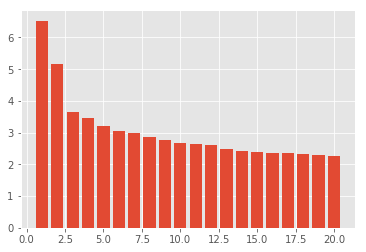

In [105]:
n_col_to_display = 20

pca_range = np.arange(n_col_to_display) + 1
plt.bar(pca_range,pca.explained_variance_[:n_col_to_display])
plt.show()

## Classifying positive/negative review with PCA preprocessing

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [109]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

lm1 = LogisticRegression()

lm1.fit(vec_train_scaled,target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [110]:
# Get score for training set
lm1.score(vec_train_scaled,target_train)

0.96027874564459925

In [111]:
# Get score for test set
lm1.score(vec_test_scaled,target_test)

0.7142857142857143

#### Use (Stardardized + PCA) tf-idf vectors as features

In [112]:
# Build a Logistic Regression Classifier, train with PCA tranformed X

from sklearn.linear_model import LogisticRegression

lm2 = LogisticRegression()

lm2.fit(X_train_pca,target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [113]:
# Get score for training set
lm2.score(X_train_pca,target_train)

0.79024390243902443

In [114]:
# Get score for test set, REMEMBER to use PCA-transformed X!
lm2.score(X_test_pca,target_test)

0.75162337662337664

#### Q: What do you see from the training score and the test score? How do you compare the results from PCA and non-PCA preprocessing?

A: The test score is lower than the training score with non-PCA preprocessing, it means that the model is overfitting the train data. One possibility is that the 

#### You can plot the coefficients against principal components


In [ ]:
# To be implemented
pass

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [118]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(min_samples_leaf = 10, n_estimators = 5)
rfc.fit(X_train_pca, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [119]:
# Get score for training set
rfc.score(X_train_pca, target_train)

0.85853658536585364

In [120]:
# Get score for test set
rfc.score(X_test_pca, target_test)

0.74512987012987009

#### Use (Stardardized + PCA) tf-idf vectors as features

In [ ]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# To be implemented
pass

In [ ]:
# Get score for training set
pass

In [ ]:
# Get score for test set, REMEMBER to use PCA-transformed X!
pass

#### Q: What do you see from the training result and the test result?

A: (insert your comments here)

#### You can plot the feature importances against principal components


In [121]:
rfc.feature_importances_

array([ 0.00629742,  0.10115114,  0.2064963 ,  0.00212923,  0.02918866,
        0.02757105,  0.0351269 ,  0.04915237,  0.04327353,  0.01123971,
        0.01391356,  0.04512831,  0.02342804,  0.01403116,  0.03327825,
        0.01026893,  0.01373458,  0.01733752,  0.        ,  0.01206647,
        0.0135188 ,  0.0083514 ,  0.00540016,  0.02484063,  0.00511784,
        0.0024995 ,  0.00814041,  0.00230697,  0.00295028,  0.00783991,
        0.00886449,  0.00309654,  0.01477022,  0.00745969,  0.01514883,
        0.01993177,  0.0077512 ,  0.00649634,  0.00736794,  0.00360487,
        0.02105255,  0.01721684,  0.00500144,  0.02035215,  0.00593024,
        0.00722321,  0.01140146,  0.02073725,  0.00628351,  0.01453047])

## Extra Credit #1: Can you cluster restaurants from their category information?
Hint: a business may have mutiple categories, e.g. a restaurant can have both "Restaurants" and "Korean"

If we categorize according to their categories, it's basically equivalent to filtering the data. Is there any actual meaning of doing so?

## Extra Credit #2: Can you try different distance/similarity metrics for clusterings, e.g. Pearson correlation, Jaccard distance, etc. 

Hint: You can take a look at [scipy](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) documentations to use other distances

#### Q: How do you compare with Cosine distance or Euclidean distance?

In [ ]:
# To be implemented

## Extra Credit #3: Can you cluster categories from business entities? What does it mean by a cluster?
Hint: Think the example where words can be clustered from the transposed tf-idf matrix.

In [ ]:
# To be implemented

## Extra Credit #4: What are the characteristics of each of the clustered  ? For each cluster, which restaurant can best represent ("define") its cluster?
Hint: how to interpret "best"?

In [ ]:
# To be implemented

## Extra Credit #5: Can you think of other use cases that clustering can be used? 
Hint: of course you can make use of other yelp dataset. You can try anything you want as long as you can explain it.

In [ ]:
# To be implemented